In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')

## Loading the data

In [2]:
d2 = pd.read_parquet(
    r"E:\Learning\TEAI Cup\Data\Parquet Data\d2_1_general_cleaning.parquet"
)
d2

,device_name,variable_name,value,timestamp,lowerLimit,upperLimit,nominalValue
0,S-226,stpStepFrIda,"1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...",2025-12-05 08:15:13,-0.10,0.10,1.00
1,S-226,teil2Wire,"1.9513,1.9592,1.9489,1.9397,1.962,1.9648,1.944...",2025-12-05 08:15:13,-0.20,0.20,2.00
2,S-226,teil2Iso,"3.4863,3.4962,3.4957,3.4841,3.4901,3.4888,3.48...",2025-12-05 08:15:13,-0.20,0.20,3.50
3,S-226,iTeil2IsostempelDef,"49.1378,48.7538,48.448,48.9035,48.923,48.8579,...",2025-12-05 08:15:13,-10.00,10.00,50.00
4,S-226,folgefehlerTeil12,"0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...",2025-12-05 08:15:13,0.00,10.00,0.00
...,...,...,...,...,...,...,...
2408391,S-226,teil1GapY,"0.5029,0.5018,0.4951,0.5008,0.5047,0.5,0.5043,...",2025-12-10 11:08:06,-0.06,0.00,0.53
2408392,S-226,teil1GapX,"0.509,0.5071,0.506,0.5134,0.509,0.5134,0.5062,...",2025-12-10 11:08:06,-0.06,0.00,0.53
2408393,S-226,iTeil1Rastfeder,"44.3393,44.7688,46.0992,46.3617,46.1708,46.349...",2025-12-10 11:08:06,-25.00,25.00,50.00
2408394,S-226,teil2Wire,"1.9311,1.9314,1.922,1.9411,1.9336,1.9271,1.935...",2025-12-10 11:08:06,-0.20,0.20,2.00


* Renaming machine_id - machine_id

In [11]:
d2.rename(columns={'device_name': "machine_id"}, inplace=True)

## Splitting the value field

In [12]:
s = d2.value.sample()
lt =s.str.split(",").tolist()
len(lt[0])

100

In [13]:
# As we can see the total values inside the value field are count == 100

In [14]:
# We can split this column in 100 more columns

In [15]:
# d2[[f"value_{i}" for i in range(1, 101)]] = (
#     d2["value"].str.split(",", expand=True).astype(float)
# )
#$ This is taking so much time

## Visulising the value field by averaging them 

In [16]:
small_d2 = d2.head(100000)

In [17]:
small_d2

,machine_id,variable_name,value,timestamp,lowerLimit,upperLimit,nominalValue
0,S-226,stpStepFrIda,"1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...",2025-12-05 08:15:13,-0.100,0.10,1.00
1,S-226,teil2Wire,"1.9513,1.9592,1.9489,1.9397,1.962,1.9648,1.944...",2025-12-05 08:15:13,-0.200,0.20,2.00
2,S-226,teil2Iso,"3.4863,3.4962,3.4957,3.4841,3.4901,3.4888,3.48...",2025-12-05 08:15:13,-0.200,0.20,3.50
3,S-226,iTeil2IsostempelDef,"49.1378,48.7538,48.448,48.9035,48.923,48.8579,...",2025-12-05 08:15:13,-10.000,10.00,50.00
4,S-226,folgefehlerTeil12,"0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...",2025-12-05 08:15:13,0.000,10.00,0.00
...,...,...,...,...,...,...,...
99995,S-268,spur1Gap,"0.192,0.191,0.19,0.191,0.187,0.19,0.19,0.178,0...",2025-12-05 10:58:23,-0.034,0.03,0.19
99996,S-268,spur1Iso,"1.934,1.935,1.934,1.934,1.936,1.937,1.935,1.93...",2025-12-05 10:58:23,-0.100,0.10,1.90
99997,S-268,spur2IKastenHinten,"0.974,0.975,0.973,0.979,0.972,0.974,0.975,0.98...",2025-12-05 10:58:23,0.000,0.11,0.95
99998,S-268,spur2Wire,"1.711,1.709,1.709,1.711,1.71,1.71,1.709,1.71,1...",2025-12-05 10:58:23,-0.100,0.10,1.70


lowerLimit = 1.8, upperLimit = 2.2, nominalValue = 2.0


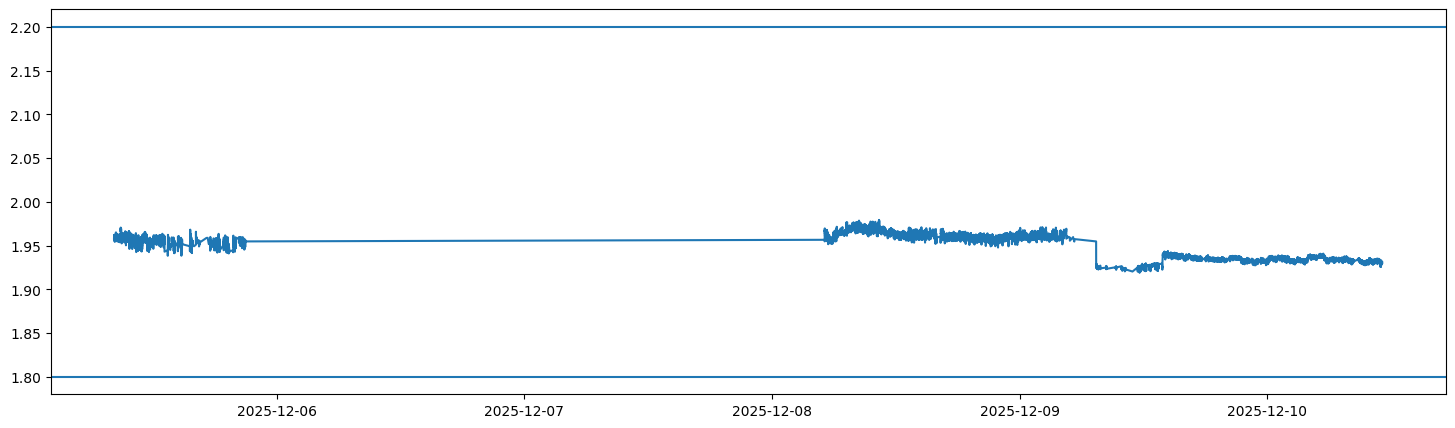

In [18]:
# Let's analyze one variable teil2Wire

# Machine code = 226

variable_name = "teil2Wire"
small_d2 = d2[d2["machine_id"] == 'S-226']
small_d2 = small_d2[small_d2.variable_name == variable_name]
small_d2_2 = small_d2[['value', 'timestamp']]

lowerLimit = small_d2.lowerLimit.iloc[10]
upperLimit = small_d2.upperLimit.iloc[10]
nominalValue = small_d2.nominalValue.iloc[10]

print(f"lowerLimit = {lowerLimit + nominalValue}, upperLimit = {upperLimit + nominalValue }, nominalValue = {nominalValue}")

def avg_value_field(x):
    nums = list(map(float, x.split(",")))
    return float(np.median(nums))

small_d2_2['avg_value'] = small_d2_2.value.apply(avg_value_field)
small_d2_2
plt.figure(figsize=(18,5))
plt.plot(small_d2_2.timestamp, small_d2_2.avg_value)
# plt.grid()
plt.axhline(lowerLimit + nominalValue)
plt.axhline(upperLimit + nominalValue)

In [19]:
small_d2_2

,value,timestamp,avg_value
1,"1.9513,1.9592,1.9489,1.9397,1.962,1.9648,1.944...",2025-12-05 08:15:13,1.95810
91,"1.9758,1.9631,1.9377,1.9572,1.9677,1.9623,1.97...",2025-12-05 08:15:18,1.95890
162,"1.9786,1.973,1.9615,1.9564,1.9604,1.9552,1.937...",2025-12-05 08:15:25,1.95925
250,"1.9711,1.966,1.9603,1.9563,1.9586,1.9678,1.957...",2025-12-05 08:15:33,1.95875
323,"1.964,1.9605,1.94,1.9633,1.9675,1.9682,1.9515,...",2025-12-05 08:15:40,1.95925
...,...,...,...
2408040,"1.9208,1.9255,1.9275,1.9293,1.9377,1.9333,1.92...",2025-12-10 11:07:35,1.93050
2408127,"1.9334,1.9292,1.9262,1.9349,1.9297,1.9337,1.93...",2025-12-10 11:07:41,1.92910
2408194,"1.918,1.9213,1.9356,1.926,1.9306,1.9274,1.9199...",2025-12-10 11:07:49,1.93060
2408275,"1.9381,1.9205,1.9164,1.9382,1.9069,1.9319,1.92...",2025-12-10 11:07:56,1.92960


In [20]:
# As we can see there are some outliers in the data, to see actual flow we have to clip them

lowerLimit = 1.8, upperLimit = 2.2, nominalValue = 2.0


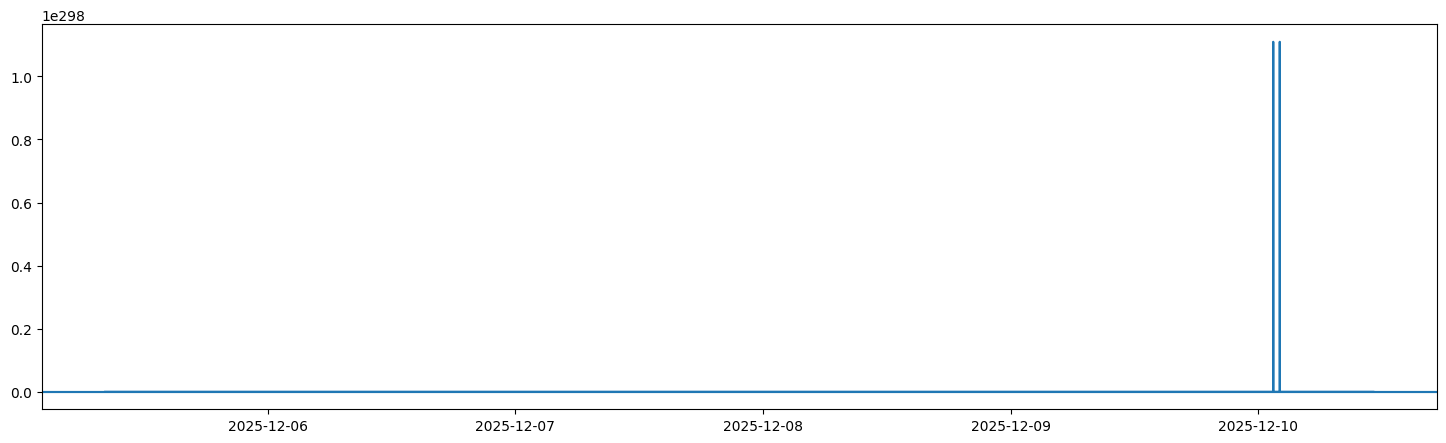

In [21]:
# Let's analyze one variable teil2Wire

# Machine code = 226

variable_name = "teil2Iso"
small_d2 = d2
small_d2 = small_d2[small_d2.variable_name == variable_name]
small_d2_2 = small_d2[["value", "timestamp"]]
small_d2_2


print(
    f"lowerLimit = {lowerLimit + nominalValue}, upperLimit = {upperLimit + nominalValue}, nominalValue = {nominalValue}"
)


def avg_value_field(x):
    nums = list(map(float, x.split(",")))
    return float(np.median(nums))


small_d2_2["avg_value"] = small_d2_2.value.apply(avg_value_field)
small_d2_2
plt.figure(figsize=(18, 5))
plt.plot(small_d2_2.timestamp, small_d2_2.avg_value)
# plt.grid()
plt.axhline(lowerLimit + nominalValue)
plt.axhline(upperLimit + nominalValue)

lowerLimit = 1.8, upperLimit = 2.2, nominalValue = 2.0


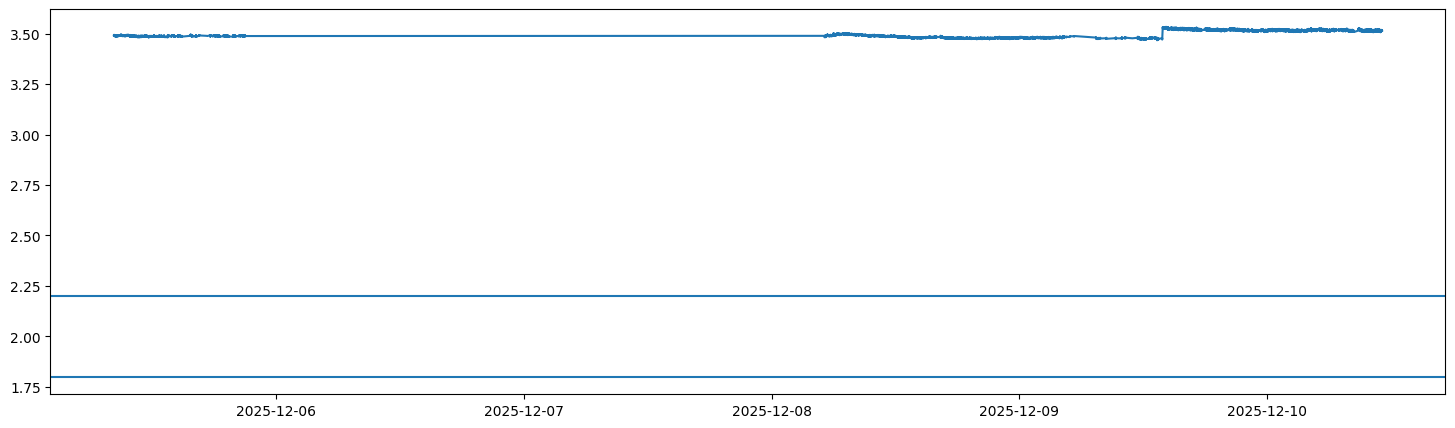

In [22]:
# Let's analyze one variable teil2Wire
variable_name = "teil2Iso"
small_d2 = d2[d2.machine_id == "S-226"]
small_d2 = small_d2[small_d2.variable_name == variable_name]
small_d2_2 = small_d2[["value", "timestamp"]]
small_d2_2


print(
    f"lowerLimit = {lowerLimit + nominalValue}, upperLimit = {upperLimit + nominalValue}, nominalValue = {nominalValue}"
)


def avg_value_field(x):
    nums = list(map(float, x.split(",")))
    return float(np.median(nums))


small_d2_2["avg_value"] = small_d2_2.value.apply(avg_value_field)
small_d2_2
plt.figure(figsize=(18, 5))
plt.plot(small_d2_2.timestamp, small_d2_2.avg_value)
# plt.grid()
plt.axhline(lowerLimit + nominalValue)
plt.axhline(upperLimit + nominalValue)

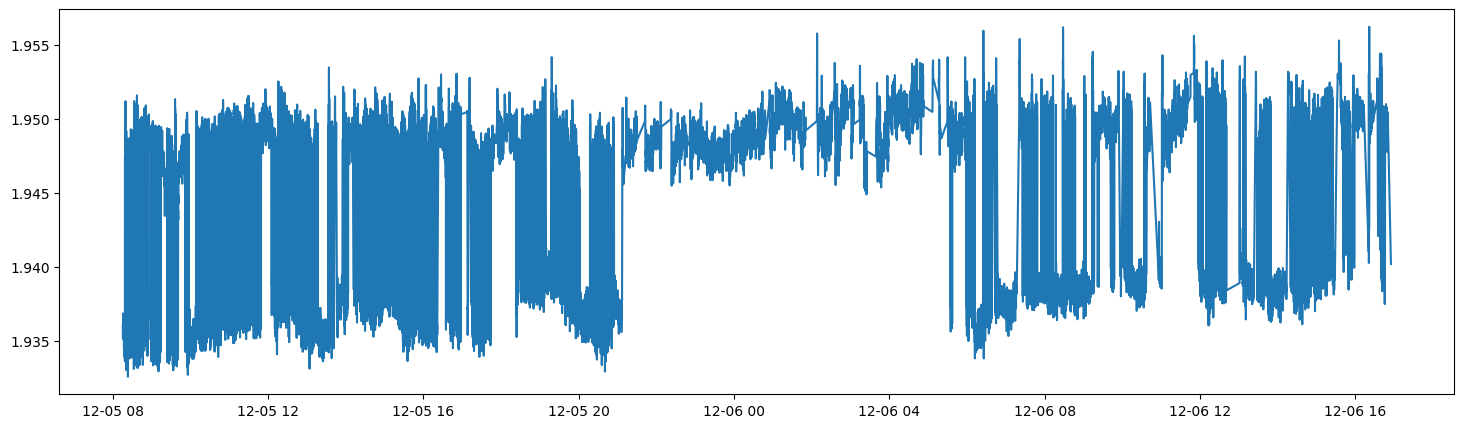

In [23]:
# Machine Code - 268
# Let's analyze one variable teil2Wire
variable_name = "spur1Iso"
small_d2 = d2.head(500000)
small_d2 = small_d2[small_d2.variable_name == variable_name]
small_d2_2 = small_d2[["value", "timestamp"]]
small_d2_2


def avg_value_field(x):
    nums = map(float, x.split(","))
    return sum(nums) / 100


small_d2_2["avg_value"] = small_d2_2.value.apply(avg_value_field)
small_d2_2
plt.figure(figsize=(18, 5))
plt.plot(small_d2_2.timestamp, small_d2_2.avg_value)
# plt.grid()


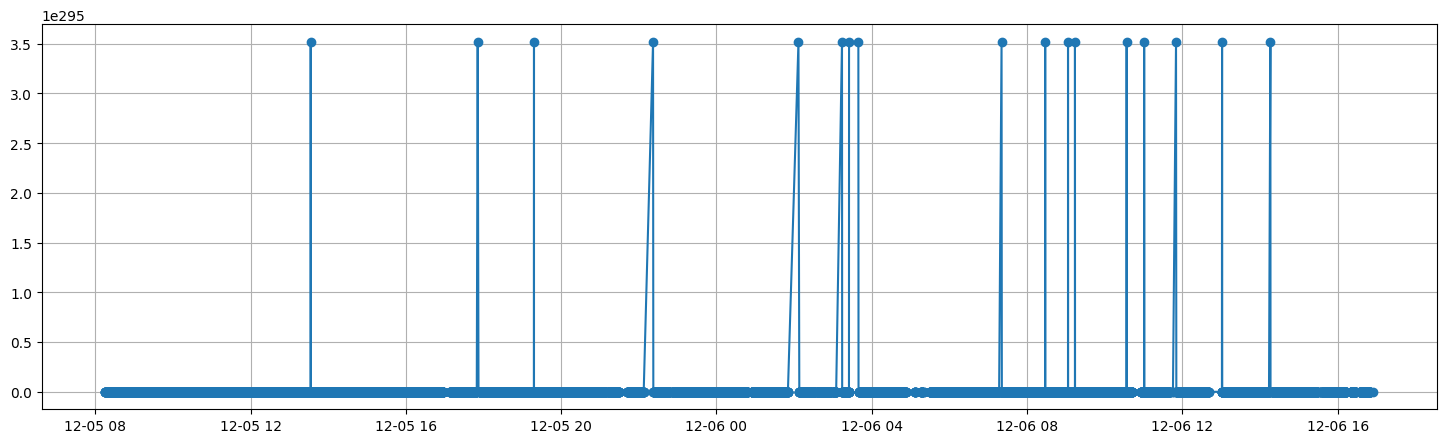

In [24]:
# Machine Code - 268
# Let's analyze one variable teil2Wire
variable_name = "spur1Gap"
small_d2 = d2.head(500000)
small_d2 = small_d2[small_d2.variable_name == variable_name]
small_d2_2 = small_d2[["value", "timestamp"]]
small_d2_2


def avg_value_field(x):
    nums = map(float, x.split(","))
    return sum(nums) / 100


small_d2_2["avg_value"] = small_d2_2.value.apply(avg_value_field)
small_d2_2
plt.figure(figsize=(18, 5))
plt.plot(small_d2_2.timestamp, small_d2_2.avg_value, marker="o")
plt.grid()


### Min and Max Time

In [25]:
minTime, maxTime = d2.timestamp.min(), d2.timestamp.max()
print(f"Time range: {minTime} to {maxTime}")

Time range: 2025-12-05 08:15:13 to 2025-12-10 11:08:06


### Filtering based on consistent time

In [26]:
start_time = "2025-12-05 08:15:13"
end_time = "2025-12-10 06:05:06"
d2 = d2[
    (d2.timestamp >= start_time) & (d2.timestamp <= end_time)
]
d2

,machine_id,variable_name,value,timestamp,lowerLimit,upperLimit,nominalValue
0,S-226,stpStepFrIda,"1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...",2025-12-05 08:15:13,-0.10,0.10,1.00
1,S-226,teil2Wire,"1.9513,1.9592,1.9489,1.9397,1.962,1.9648,1.944...",2025-12-05 08:15:13,-0.20,0.20,2.00
2,S-226,teil2Iso,"3.4863,3.4962,3.4957,3.4841,3.4901,3.4888,3.48...",2025-12-05 08:15:13,-0.20,0.20,3.50
3,S-226,iTeil2IsostempelDef,"49.1378,48.7538,48.448,48.9035,48.923,48.8579,...",2025-12-05 08:15:13,-10.00,10.00,50.00
4,S-226,folgefehlerTeil12,"0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...",2025-12-05 08:15:13,0.00,10.00,0.00
...,...,...,...,...,...,...,...
2272467,S-226,teil2GapX,"0.4968,0.4947,0.5017,0.4991,0.5023,0.5029,0.50...",2025-12-10 06:05:06,-0.06,0.00,0.53
2272468,S-226,teil2GapY,"0.4975,0.4852,0.4824,0.4824,0.4941,0.4863,0.48...",2025-12-10 06:05:06,-0.06,0.00,0.53
2272469,S-226,prfungTeil1KastenSpk,"1.8906,1.8895,1.8887,1.8898,1.882,1.8869,1.880...",2025-12-10 06:05:06,0.00,0.35,1.60
2272470,S-226,iTeil1Rastfederdifferenz,"0.0034,0.0032,0.0033,0.0006,0.0056,0.0023,0.00...",2025-12-10 06:05:06,-0.08,0.08,0.00


# Saving the current data

In [27]:
d2.to_parquet(
    r"E:\Learning\TEAI Cup\Data\Parquet Data\d2_2_general_cleaning.parquet", index=False
)